In [1]:
### cleanse customers 

import pandas as pd
import seaborn as sns

def summaryOfData(file, *s):
    print("DESCRIBE\n",file.describe(), "\n")
    print("TYPES\n\n",file.dtypes, "\n")
    print("SHAPE\n\n",file.shape, "\n")
    print("INFO\n\n", file.info(), "\n")
    ###print("VALUE COUNTS\n\n", file[s].value_counts(), "\n")
    print("UNIQUE\n\n",file.nunique(), "\n")
    print("IS NA SUM\n\n",file.isna().sum(), "\n")
    print("IS DUP \n\n",file[file.duplicated()], "\n")
        

In [2]:
dataCustomers=pd.read_csv("customers.csv")
print(dataCustomers.head())
summaryOfData(dataCustomers)
## Conclusion - nothing to clean for Customers. 

### cleanse products
dataProducts = pd.read_csv("products.csv")
print(dataProducts.head())
summaryOfData(dataProducts)
print('what are the category counts: \n',dataProducts.categ.value_counts())

  client_id sex  birth
0    c_4410   f   1967
1    c_7839   f   1975
2    c_1699   f   1984
3    c_5961   f   1962
4    c_5320   m   1943
DESCRIBE
              birth
count  8623.000000
mean   1978.280877
std      16.919535
min    1929.000000
25%    1966.000000
50%    1979.000000
75%    1992.000000
max    2004.000000 

TYPES

 client_id    object
sex          object
birth         int64
dtype: object 

SHAPE

 (8623, 3) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB
INFO

 None 

UNIQUE

 client_id    8623
sex             2
birth          76
dtype: int64 

IS NA SUM

 client_id    0
sex          0
birth        0
dtype: int64 

IS DUP 

 Empty DataFrame
Columns: [client_id, sex, birth]

In [4]:
### cleanse transactions
dataTransactions = pd.read_csv("transactions.csv")
print(dataTransactions.head())
summaryOfData(dataTransactions) ## need to modify function - bc date is really what we should compare against

  id_prod                        date session_id client_id
0  0_1483  2021-04-10 18:37:28.723910    s_18746    c_4450
1   2_226  2022-02-03 01:55:53.276402   s_159142     c_277
2   1_374  2021-09-23 15:13:46.938559    s_94290    c_4270
3  0_2186  2021-10-17 03:27:18.783634   s_105936    c_4597
4  0_1351  2021-07-17 20:34:25.800563    s_63642    c_1242
DESCRIBE
        id_prod                             date session_id client_id
count   337016                           337016     337016    337016
unique    3266                           336855     169195      8602
top      1_369  test_2021-03-01 02:30:02.237413        s_0    c_1609
freq      1081                               13        200     12855 

TYPES

 id_prod       object
date          object
session_id    object
client_id     object
dtype: object 

SHAPE

 (337016, 4) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 337016 entries, 0 to 337015
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ---

In [5]:
### things that are wrong 

#### 1. products - price cannot be negative (remove or impute? should it just be 0 then?)

### how many negative prices are there? 
## !! JUST 1
#negative = dataProducts[dataProducts['price']<=0]
#print(negative)

### how any rows are there of that product? 
## !! T_0 -> 1 row
#prodT_0 = dataProducts[dataProducts['id_prod']== 'T_0']
#print(prodT_0)
#print(dataTransactions[dataTransactions['id_prod']== 'T_0'])
## !!! cannot remove T_0 because then the transaction table wont have anything to map to.

### how many products are there in table? will removing this one impact metrics?
#print(dataProducts['id_prod'].nunique())
## !!! 3287 unique products

### change price of T_0 to 0 instead of -1 and run describe again 
print(dataProducts.loc[dataProducts['id_prod'] =='T_0'])
dataProducts.loc[[731],['price']] = 0 
print(dataProducts.loc[dataProducts['id_prod'] =='T_0'])

#### 2. transactions - dups 
dataTransactions = dataTransactions.drop_duplicates(keep= "first")
#assert dataTransactions.duplicated() == null, "There are dups"




    id_prod  price  categ
731     T_0   -1.0      0
    id_prod  price  categ
731     T_0    0.0      0


id_prod     object
price      float64
categ        int64
dtype: object

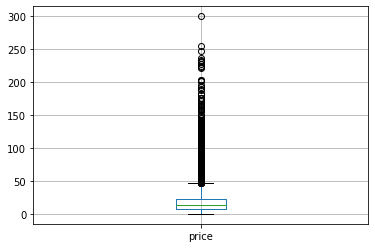

In [7]:
## products
dataProducts.boxplot(column='price') ## are these outliers? or just many diff products? how do i dtermine what is "outlier"?
dataProducts['price'].astype(float)
display(dataProducts.dtypes)
#display(dataProducts[dataProducts['price']<1])

In [9]:
#display(dataTransactions[dataTransactions['id_prod']=='T_0'])
# remove test transactions 
# if the "date' has "test" then drop 
dataTransactions=dataTransactions[dataTransactions['date'].str.contains('test')==False]

In [10]:
## convert to proper format each of values -> $ should be floats, dates should be datetimes
dataTransactions['date'] =  pd.to_datetime(dataTransactions['date'])
#display(dataTransactions.dtypes)

In [11]:
dataTransactions['Month'] = dataTransactions['date'].dt.month
dataTransactions['Year'] = dataTransactions['date'].dt.year
dataTransactions['Day'] = dataTransactions['date'].dt.day
dataTransactions['Weekday'] = dataTransactions['date'].dt.weekday
dataTransactions['Hour'] = dataTransactions['date'].dt.hour
dataTransactions['Minute'] = dataTransactions['date'].dt.minute

In [12]:
Months = {1:'Jan',2:'Feb',3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'}
Weekday = {0:"Mon", 1:"Tue", 2:"Wed", 3:"Thu", 4:"Fri", 5:"Sat", 6:"Sun"}
dataTransactions['Weekday'].replace(Weekday, inplace=True)
dataTransactions['Month'].replace(Months, inplace=True)

2021-03-01 00:01:07.843138
2022-02-28 23:59:58.040472


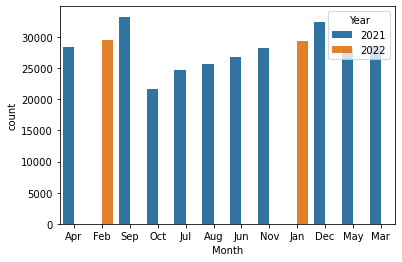

In [13]:
sns.countplot(data=dataTransactions, x='Month', hue='Year')
print(dataTransactions['date'].min())
print(dataTransactions['date'].max())

<AxesSubplot:xlabel='Year', ylabel='count'>

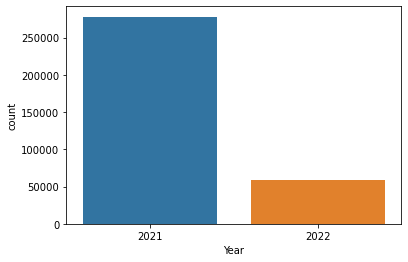

In [14]:
sns.countplot(x=dataTransactions.Year)

<AxesSubplot:xlabel='Weekday', ylabel='count'>

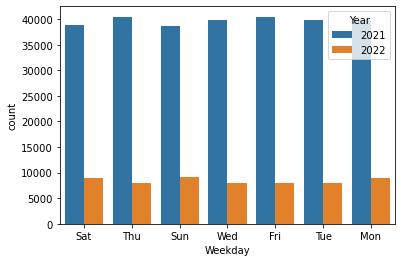

In [16]:
sns.countplot(data=dataTransactions, x='Weekday', hue='Year')

In [ ]:
#### task2 Indicators of central tendency and dispersion. ####
# analyzing the transactions date and price
## merge products and transactions on 'id_prod' as left join

In [15]:
dataProductsTransactionsLeft = dataTransactions.merge(dataProducts,on=['id_prod'], how='left')
display(dataTransactions.shape)
display(dataProductsTransactionsLeft.shape)

(336816, 10)

(336816, 12)

In [16]:
display(dataProductsTransactionsLeft[dataProductsTransactionsLeft['id_prod'].isna()==True])
display(dataProductsTransactionsLeft[dataProductsTransactionsLeft['date'].isna()==True])
### there are no null values for dates or id_prod so thats good. should use left join

,id_prod,date,session_id,client_id,Month,Year,Day,Weekday,Hour,Minute,price,categ


,id_prod,date,session_id,client_id,Month,Year,Day,Weekday,Hour,Minute,price,categ


In [17]:
dataProductsTransactionsCustomersLeft = dataProductsTransactionsLeft.merge(dataCustomers, on='client_id', how='left')

In [18]:
dataProductsTransactionsCustomersLeft.describe()
dataProductsTransactionsCustomersLeft.head()

,id_prod,date,session_id,client_id,Month,Year,Day,Weekday,Hour,Minute,price,categ,sex,birth
0,0_1483,2021-04-10 18:37:28.723910,s_18746,c_4450,Apr,2021,10,Sat,18,37,4.99,0.0,f,1977
1,2_226,2022-02-03 01:55:53.276402,s_159142,c_277,Feb,2022,3,Thu,1,55,65.75,2.0,f,2000
2,1_374,2021-09-23 15:13:46.938559,s_94290,c_4270,Sep,2021,23,Thu,15,13,10.71,1.0,f,1979
3,0_2186,2021-10-17 03:27:18.783634,s_105936,c_4597,Oct,2021,17,Sun,3,27,4.20,0.0,m,1963
4,0_1351,2021-07-17 20:34:25.800563,s_63642,c_1242,Jul,2021,17,Sat,20,34,8.99,0.0,f,1980


In [19]:
## qualitative representation - category

# time series to determine whether dates are missing for transactions - plot it to see if theres gaps in data 
#sns.plot(data=dataProductsTransactionsCustomersLeft, x='date')
#dataProductsTransactionsCustomersLeft.plot(x='Year', y='date')
date_range = pd.date_range(start="2021-03-01", end="2022-02-28", freq="D")

##this doesnt work 
missing_dates = date_range[~date_range.isin(dataProductsTransactionsCustomersLeft.index)]
print(missing_dates)
## quantitative - histograms -> price
#sns.histplot(data=dataProductsTransactionsCustomersLeft, x= "price", bins = 50, kde=True)
#sns.histplot(data=dataProductsTransactionsCustomersLeft, x= "Month", bins = 12, kde=True)
#sns.histplot(data=dataProductsTransactionsCustomersLeft, x= "birth", bins = 30)


DatetimeIndex(['2021-03-01', '2021-03-02', '2021-03-03', '2021-03-04',
               '2021-03-05', '2021-03-06', '2021-03-07', '2021-03-08',
               '2021-03-09', '2021-03-10',
               ...
               '2022-02-19', '2022-02-20', '2022-02-21', '2022-02-22',
               '2022-02-23', '2022-02-24', '2022-02-25', '2022-02-26',
               '2022-02-27', '2022-02-28'],
              dtype='datetime64[ns]', length=365, freq='D')


336713


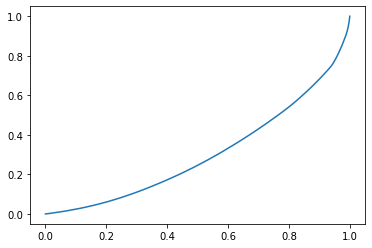

In [20]:
#### A concentration analysis, using a Lorenz curve and a Gini coefficient.
import numpy as np

price = dataProductsTransactionsCustomersLeft[dataProductsTransactionsCustomersLeft['price'] > 0]
priceOnly = price.price

def lorenzCurve(priceOnly):
    n = len(priceOnly)
    lorenz = np.cumsum(np.sort(priceOnly)) / priceOnly.sum()
    lorenz = np.append([0],lorenz) # The Lorenz Curve begins at 0
    xaxis = np.linspace(0-1/n,1+1/n,n+1) # There is 1 segment (of size n) for each individual, plus 1 segment at y=0. The first segment starts at 0-1/n and the last one finishes at 1+1/n
    sns.lineplot(data=priceOnly,x=xaxis,y=lorenz,drawstyle='steps-post')
    return lorenz,n

lorenzPriceAll,size = lorenzCurve(priceOnly)
print(size)

In [21]:
def gini(lorenz, size):
    #print(lorenz.sum())
    #print("size ",size)
    AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/size # area under the Lorenz Curve. The first segment (lorenz[0]) is halfly below O, so we divide it by 2. We do the same for the mast segment lorenz[-1]
    S = 0.5 - AUC # area between 1st bisector and the Lorenz Curve
    gini = 2*S
    return gini

gini(lorenzPriceAll,size)

0.392145510890881

In [ ]:
### remove anything above 40$ and do lorenz curve 0-40$ and see the gini coefficient 

<AxesSubplot:>

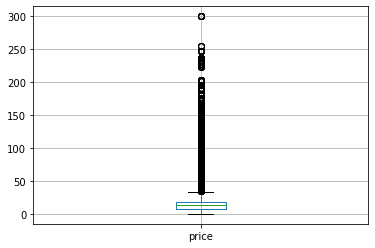

In [22]:
dataProductsTransactionsCustomersLeft.boxplot(column='price')

In [23]:
## central tendency
dataProductsTransactionsCustomersLeft['price'].describe()

count    336713.000000
mean         17.215189
std          17.855445
min           0.620000
25%           8.610000
50%          13.900000
75%          18.990000
max         300.000000
Name: price, dtype: float64

In [24]:
### anything above 19$ is outlier? rerun lorenz/gini w prices 0-19

dataProductsTransactionsCustomersLeftPriceLess19=dataProductsTransactionsCustomersLeft[dataProductsTransactionsCustomersLeft['price'] < 32]

In [25]:
dataProductsTransactionsCustomersLeftPriceLess19['price'].describe()

count    315463.000000
mean         13.670407
std           6.754064
min           0.620000
25%           8.090000
50%          12.990000
75%          17.990000
max          31.990000
Name: price, dtype: float64

<AxesSubplot:>

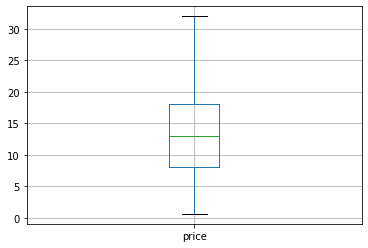

In [26]:
dataProductsTransactionsCustomersLeftPriceLess19.boxplot(column='price')

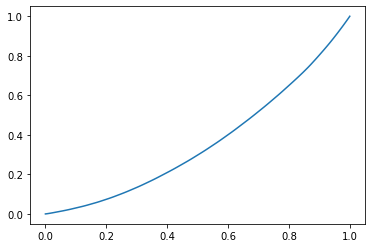

In [27]:
#### lorenz + gini on price 0-19
price19 = dataProductsTransactionsCustomersLeftPriceLess19[dataProductsTransactionsCustomersLeftPriceLess19['price'] > 0]
price19Only = price19.price
lorenzCurve19,size19 = lorenzCurve(price19Only)

In [28]:
gini(lorenzCurve19,size19)

0.28016651177326046

<AxesSubplot:xlabel='Month', ylabel='price'>

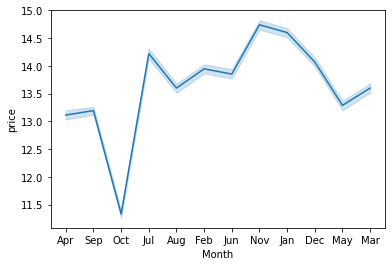

In [29]:
### time series graph (i.e a graph in which the abscissa axis represents dates).
sns.lineplot(data=dataProductsTransactionsCustomersLeftPriceLess19,x='Month',y='price')

<AxesSubplot:xlabel='Day', ylabel='price'>

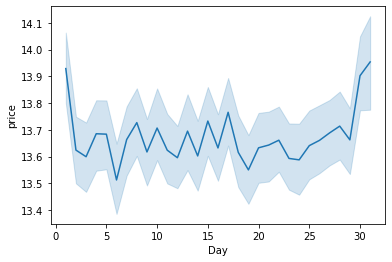

In [30]:
sns.lineplot(data=dataProductsTransactionsCustomersLeftPriceLess19,x='Day',y='price')

In [45]:
### Bivariate analyses.

<AxesSubplot:xlabel='birth', ylabel='Count'>

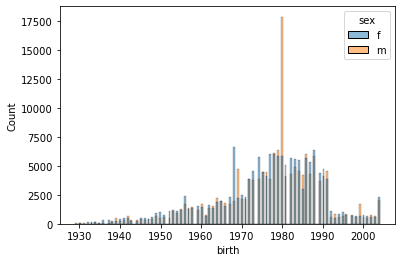

In [31]:
sns.histplot(data=dataProductsTransactionsCustomersLeftPriceLess19, x='birth', hue='sex')

## follow up is this the same customer buying a lot??

In [ ]:
#create bins representing decades get perentiles per decade 

<AxesSubplot:xlabel='Day', ylabel='Count'>

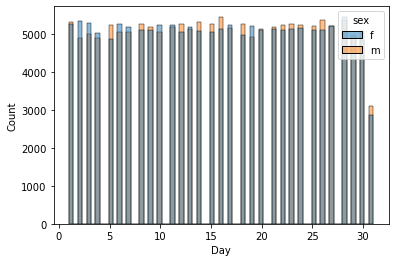

In [33]:
sns.histplot(data=dataProductsTransactionsCustomersLeftPriceLess19, x='Day', hue='sex')

<AxesSubplot:xlabel='categ', ylabel='Count'>

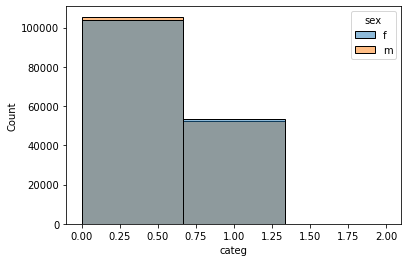

In [34]:
############# TASK 3 ##########################

## Is there a correlation between gender and categories of products purchased?
#dataProductsTransactionsCustomersLeftPriceLess19.corr(method='pearson') -- didnt tell me anything
dataProductsTransactionsCustomersLeftPriceLess19.head(2)
sns.histplot(data=dataProductsTransactionsCustomersLeftPriceLess19, x='categ', bins=3, hue='sex')

### Conclusion -> noticed that categ 2 is now missing, is it because its higher than 32$? must be.
## try to use r2

<AxesSubplot:xlabel='categ', ylabel='Count'>

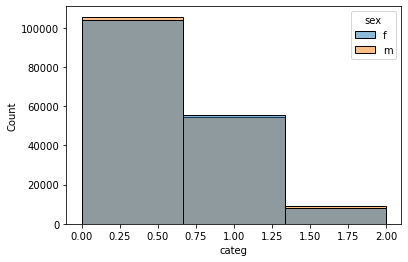

In [35]:
sns.histplot(data=dataProductsTransactionsCustomersLeft, x='categ', bins=3, hue='sex')

In [36]:
dataProductsTransactionsCustomersLeft[['categ','sex']].value_counts()
## Conclusion -> men have more transactions in each categoiry than women 0-300$ 

categ  sex
0.0    m      105640
       f      103786
1.0    f       55469
       m       54266
2.0    m        9292
       f        8260
dtype: int64

In [37]:
dataProductsTransactionsCustomersLeftPriceLess19[['categ','sex']].value_counts()

categ  sex
0.0    m      105574
       f      103730
1.0    f       53604
       m       52542
2.0    m           7
       f           6
dtype: int64

<AxesSubplot:xlabel='birth', ylabel='price'>

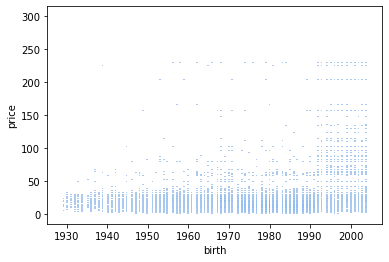

In [38]:
## Is there a correlation between age and:
## ## The total amount of purchases?
## ## The purchase frequency (the number of purchases per month for example)?
## ## The average basket size (in number of items)?
## ## Categories of purchased products?

## age vs total amount of purchases
sns.histplot(data = dataProductsTransactionsCustomersLeft, x='birth',y='price', palette='deep')
### Conclusion -> a lot of purchases made by ppl born 1990+

<AxesSubplot:xlabel='Month', ylabel='count'>

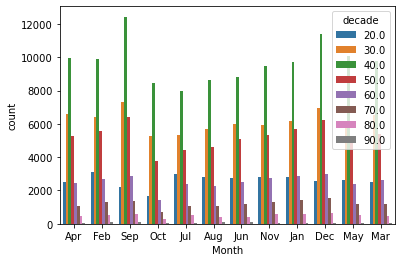

In [39]:
## ave age vs The purchase frequency (the number of purchases per month for example)?
dataProductsTransactionsCustomersLeft['decade']=np.floor(((2024-dataProductsTransactionsCustomersLeft['birth'])/10))*10
sns.countplot(data = dataProductsTransactionsCustomersLeft, x='Month',hue="decade")
### Conclusion -> most people who are buying are 30,40,50 year round, most purchases in sept.

In [ ]:
# age and average basket size (in number of items)?


<AxesSubplot:xlabel='decade', ylabel='count'>

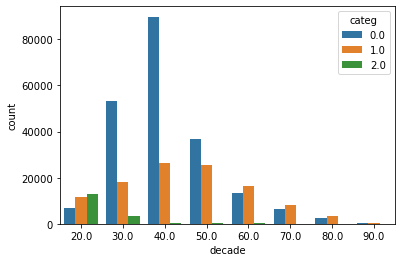

In [40]:
# age and Categories of purchased products?
sns.countplot(data = dataProductsTransactionsCustomersLeft, x='decade',hue="categ")
## Conclusion - only 20 and 30 year olds buy categ 3. ... 30-50 year olds buy the most in every categority.

In [44]:
### linear regression between age and categories 
### age and purchase frequency 
import statsmodels.api as sm
import matplotlib.pyplot as plt

model = sm.OLS(dataProductsTransactionsCustomersLeftPriceLess19['birth'],dataProductsTransactionsCustomersLeftPriceLess19['price']).fit()
print(model.summary())


                                 OLS Regression Results                                
Dep. Variable:                  birth   R-squared (uncentered):                   0.803
Model:                            OLS   Adj. R-squared (uncentered):              0.803
Method:                 Least Squares   F-statistic:                          1.288e+06
Date:                Tue, 09 Jul 2024   Prob (F-statistic):                        0.00
Time:                        16:30:19   Log-Likelihood:                     -2.5853e+06
No. Observations:              315463   AIC:                                  5.171e+06
Df Residuals:                  315462   BIC:                                  5.171e+06
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/var/folders/cy/8zslr33d3hqbx1vkw9grhgm40000gn/T/ipykernel_1554/630341931.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataProductsTransactionsCustomersLeftPriceLess19['predicted'] = reg.predict(X)


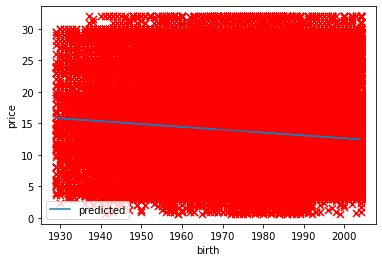

In [46]:
from sklearn.linear_model import LinearRegression
X = np.array(dataProductsTransactionsCustomersLeftPriceLess19['birth']).reshape(-1,1)
y = np.array(dataProductsTransactionsCustomersLeftPriceLess19['price'])
# fit the model
reg = LinearRegression().fit(X, y)
dataProductsTransactionsCustomersLeftPriceLess19['predicted'] = reg.predict(X)

fig, ax = plt.subplots()
dataProductsTransactionsCustomersLeftPriceLess19.plot.scatter(x = 'birth', y = 'price', s = 50,  marker = 'x', c = 'red', ax = ax)
dataProductsTransactionsCustomersLeftPriceLess19.plot.line(x = 'birth', y = 'predicted', ax = ax)
plt.show()
